<a href="https://colab.research.google.com/github/jillellalavanya/Minor-Project/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.88 ms (started: 2021-05-22 17:08:03 +00:00)


In [2]:
!pip install bing-image-downloader

time: 2.73 s (started: 2021-05-22 17:08:08 +00:00)


In [3]:
!mkdir images

time: 113 ms (started: 2021-05-22 17:08:14 +00:00)


In [25]:
from bing_image_downloader import downloader
downloader.download("cabbage",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Brassica_oleracea_Helgoland1.jpg/1200px-Brassica_oleracea_Helgoland1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.leopoldmuseum.org/media/image/800/69.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.omafra.gov.on.ca/IPM/images/brassica/diseases/white-rot-cabbage2_zoom.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.kcn.ne.jp/~ca001/Z28-1
[%] File Downloaded !

[%] Downloading Image #5 from http://fruttygarden.xyz/wp-content/uploads/2016/07/jobare2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cdn.shopify.com/s/files/1/1698/1675/products/Carrot_Imperator_1024x1024.jpg?v=1536794020
[%] File Downloaded !

[%] Downloading Image #7 from https://fastplants.org/wp-content/uploads/2017/02/StandardAlt3.png
[%] File Downloaded !

[%] Downloading Image #8 from https://www

In [26]:
downloader.download("blue whale",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.oceanlight.com/stock-photo/blue-whale-dorsal-fin-picture-16209-437989.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://i.ytimg.com/vi/7sxDuaoOBfI/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://mturbogamer.com/wp-content/uploads/2017/02/where-do-blue-whales-live-in-the-world.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.wired.com/photos/59419da7e9030c15ddbcd84e/master/pass/whale_heart.jpg
[Error]Invalid image, not saving https://media.wired.com/photos/59419da7e9030c15ddbcd84e/master/pass/whale_heart.jpg

[!] Issue getting: https://media.wired.com/photos/59419da7e9030c15ddbcd84e/master/pass/whale_heart.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #4 from https://www.nps.gov/chis/planyourvisit/images/960-5S7W2608a_1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://img.thedailybeas

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/images'

categories = ['cabbage','blue whale'] 
target = []
images = []
flat_data = []

for category in categories:
  class_num = categories.index(category)
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) 
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 22.7 s (started: 2021-05-22 17:13:58 +00:00)


In [28]:
flat_data[0]

array([0.62247216, 0.61917804, 0.44129412, ..., 0.65423608, 0.62623608,
       0.43906039])

time: 3.41 ms (started: 2021-05-22 17:14:26 +00:00)


In [29]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 4.1 ms (started: 2021-05-22 17:14:32 +00:00)


<BarContainer object of 2 artists>

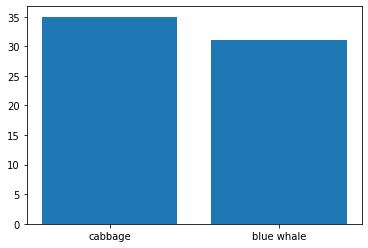

time: 120 ms (started: 2021-05-22 17:14:36 +00:00)


In [30]:
unique,count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                test_size=0.3,random_state=106)

time: 16 ms (started: 2021-05-22 17:14:43 +00:00)


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']},
]
svc = svm.SVC(probability =True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 40 s (started: 2021-05-22 17:14:49 +00:00)


In [33]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

time: 67.5 ms (started: 2021-05-22 17:15:36 +00:00)


In [34]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

time: 6.08 ms (started: 2021-05-22 17:15:40 +00:00)


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix


time: 996 µs (started: 2021-05-22 17:15:56 +00:00)


In [36]:
accuracy_score(y_pred,y_test)

0.85

time: 5.61 ms (started: 2021-05-22 17:16:00 +00:00)


In [37]:
confusion_matrix(y_pred,y_test)


array([[9, 2],
       [1, 8]])

time: 8.01 ms (started: 2021-05-22 17:16:11 +00:00)


In [38]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 32.1 ms (started: 2021-05-22 17:16:16 +00:00)


In [39]:
model = pickle.load(open('img_model.p','rb'))

time: 13.8 ms (started: 2021-05-22 17:16:19 +00:00)


Enter your urlhttps://www.hakaimagazine.com/wp-content/uploads/header-whale-dodges-ship.jpg
(1201, 2500, 3)
Predicted output: blue whale


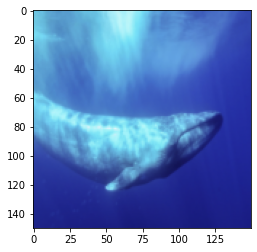

time: 13.1 s (started: 2021-05-22 17:17:30 +00:00)


In [42]:
flat_data=[]
url = input('Enter your url')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted output: {y_out}')
